# Intro to Python 3: Visualization, Lesson II (Gapminder dataset)

Please see the titanic notebook for an introduction to data visualization using **matplotlib** and **seaborn**.

In this lesson, we will apply these two libraries to visualize data from the gapminder dataset.



1. First, we need to import the [**Pandas**, Python's data analysis library](https://pandas.pydata.org/) that allows us to work with dataframes. It is almost universal practice among Python users to import Pandas under the name "pd" to serve as a useful abbreviation we can use when calling Pandas functions. We will also import **pathlib** and **glob** to help us work with file paths.

In [47]:
#working with dataframes
import pandas as pd

#working with file paths
import pathlib, glob
from pathlib import Path

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

<h2>Data, Statistics... and Optimism?</h2>
<img src="https://m.media-amazon.com/images/I/81KGpG+9mNL._RI_.jpg" style="width:60%;">


2. Watch the famous video of Hans Rosling's Presentation with the Gapminder dataset: ["200 Countries, 200 Years, 4 Minutes"](https://www.youtube.com/watch?v=jbkSRLYSojo).

<div class="alert alert-success" role="alert"><p style="color:green">2b. What different visual variables does Rosling use to encode data? What data is encoded in those variables?</p></div>





3. Now let's import this dataset. It is pre-loaded with the **Plotly Express** library, a visualization library we will get back to at the end of the lesson.

In [48]:
gapminder_df = px.data.gapminder()
# gapminder_path = Path("~/shared/RR-workshop-data/gapminder").expanduser() 
#gapminder_csvpath = Path(gapminder_path, "gapminder_all.csv")
#gapminder_df = pd.read_csv(gapminder_csvpath)

<div class="alert alert-success" role="alert"><p style="color:green">4. Now, use the .head(), .describe(), .columns and other methods you learned in the previous lesson to review summary information about this dataset.</div></p>

In [49]:
gapminder_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [50]:
gapminder_df.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709
min,1952.00000,23.599000,6.001100e+04,241.165876,4.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000
50%,1979.50000,60.712500,7.023596e+06,3531.846989,410.000000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000


In [51]:
gapminder_df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [52]:
gapminder_df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

<div class="alert alert-success" role="alert"><p style="color:green">5. How would you go about recreating Hans Rosling's visualization for one year, 1952? What seaborn plot type would you use? </p></div>

<div class="alert alert-success" role="alert"><p style="color:green">What data would you place on your x and y axes? Create a plot with just this x and y info included.</p></div>

<AxesSubplot:xlabel='gdpPercap', ylabel='lifeExp'>

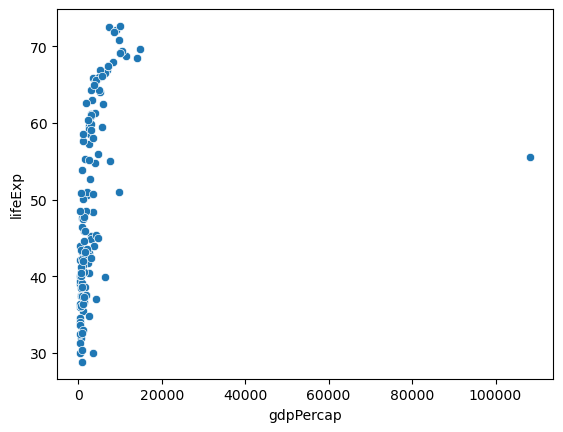

In [53]:
gap1952 = gapminder_df[gapminder_df['year'] == 1952]
sns.scatterplot(data  = gap1952, x = "gdpPercap", y = "lifeExp")
#sns.scatterplot(data = gapminder_df, x = "gdpPercap_1952", y = "lifeExp_1952")

<div class="alert alert-success" role="alert"><p style="color:green">5b. Now re-create the same graph, but this time with data for 1957.</p></div>

<AxesSubplot:xlabel='gdpPercap', ylabel='lifeExp'>

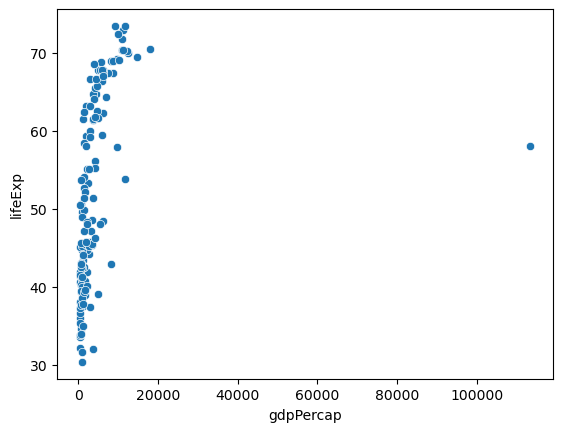

In [54]:
gap1957 = gapminder_df[gapminder_df['year'] == 1957]
sns.scatterplot(data  = gap1957, x = "gdpPercap", y = "lifeExp")


6. Notice the strange outlier on the far right of the plots above? We can subset or filter our dataset to identify it in several ways:

In [55]:
gapminder_df[(gapminder_df['year'] == 1957) & (gapminder_df['gdpPercap'] > 100000)]
#gapminder_df.loc[(gapminder_df['year'] == 1957) & (gapminder_df['gdpPercap'] > 100000)]   #this works the same!

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
853,Kuwait,Asia,1957,58.033,212846,113523.1329,KWT,414


7. We can also identify outliers by adding labels. This code gets slightly more complicated, but notice it is the **plt.annotate** command that adds the label of each country within a **for loop** that iterates through a list of countries in the dataset.

In [56]:
gap1957.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
13,Albania,Europe,1957,59.280,1476505,1942.284244,ALB,8
25,Algeria,Africa,1957,45.685,10270856,3013.976023,DZA,12
37,Angola,Africa,1957,31.999,4561361,3827.940465,AGO,24
49,Argentina,Americas,1957,64.399,19610538,6856.856212,ARG,32


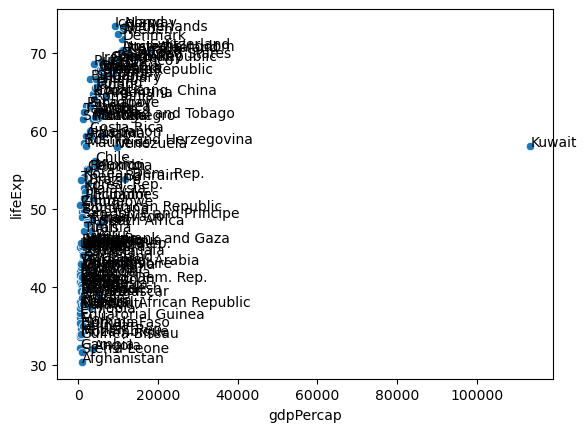

In [57]:
sns.scatterplot(data = gap1957, x = "gdpPercap", y = "lifeExp")
countries = list(gap1957['country'])
for i, country in enumerate(countries):
    #print(i, country, gap1957.iloc[i, 5])
    plt.annotate(country, (gap1957.iloc[i, 5], gap1957.iloc[i, 3]))

7b. We can also annotate a single country with the following:

*Note: there may be an easier way of doing this....*

Text(853    113523.1329
Name: gdpPercap, dtype: float64, 853    58.033
Name: lifeExp, dtype: float64, 'Kuwait')

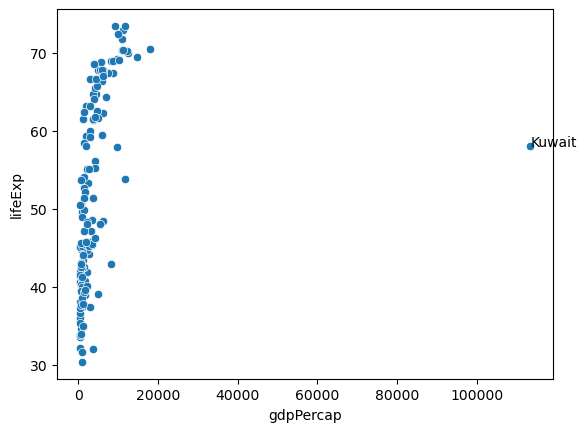

In [58]:
sns.scatterplot(data = gap1957, x = "gdpPercap", y = "lifeExp")
kuwait = gap1957[gap1957['country'] == "Kuwait"]
plt.annotate("Kuwait", (kuwait.loc[:,'gdpPercap'], kuwait.loc[:,"lifeExp"]))

8. We can then remove this outlier from our dataset.

In [59]:
print(gapminder_df.shape)
gapminder_df = gapminder_df[gapminder_df['country'] != "Kuwait"]
print(gapminder_df.shape)

(1704, 8)
(1692, 8)


9. Now, let's plot a series of years from our dataset. We can more easily plot different years using a formatted string. A formatted string allows us to insert variables into a string, from which Python will read the variables' values.

Formatted strings are indicated by the "f" that precedes the opening quotation mark and variable names are indicated by the quotation marks surrounding them:

```
f"This is a sentence with a {variable}."
```

For example, we could use formatted strings to update today's date by writing:



In [60]:
mon = "April"
date = 25
year = 2023
f"Hello, today's date is {mon} {date}, {year}." 

"Hello, today's date is April 25, 2023."

Try updating the date above and see how the output changes.

10. Now, let's use formatted strings to quickly change the year of our plot.

<AxesSubplot:xlabel='gdpPercap', ylabel='lifeExp'>

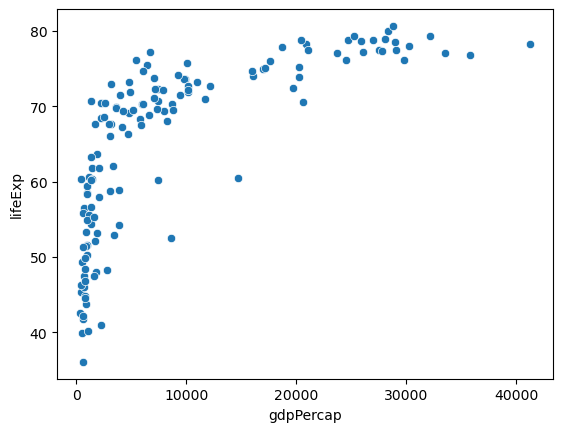

In [61]:
yr = 1997
sns.scatterplot(data = gapminder_df[gapminder_df['year'] == yr], x = "gdpPercap", y = "lifeExp")

<div class="alert alert-success" role="alert"><p style="color:green">11. Do you notice the nonlinear pattern in this data, which did not appear in Hans Rosling's animated visualization? That is because he used the logarithmic values of GDP per capita. Copy and paste the above code below, but this time adding the following line after it:</p></div>

```
plt.xscale('log')
```

<div class="alert alert-success" role="alert"><p style="color:green"><b>Experiment with the code below by changing the year value.</b></p></div>

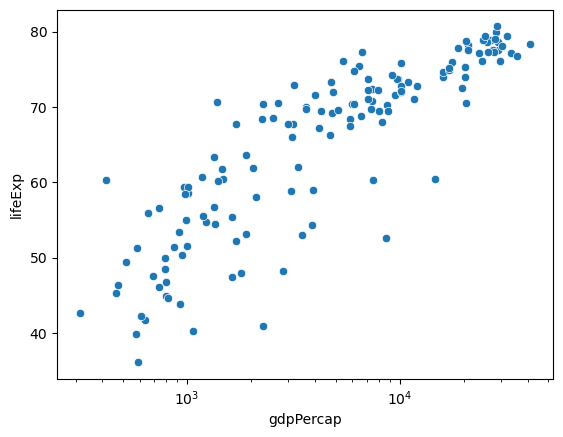

In [62]:
yr = 1997
sns.scatterplot(data = gapminder_df[gapminder_df['year'] == yr], x = "gdpPercap", y = "lifeExp")
plt.xscale('log')

<div class="alert alert-success" role="alert"><p style="color:green">12. We can then differentiate countries by their continent. To color each observation by the "continent" column add the following to the code above (you can paste it below).</p></div>

```
..., hue = "continent"...)
```

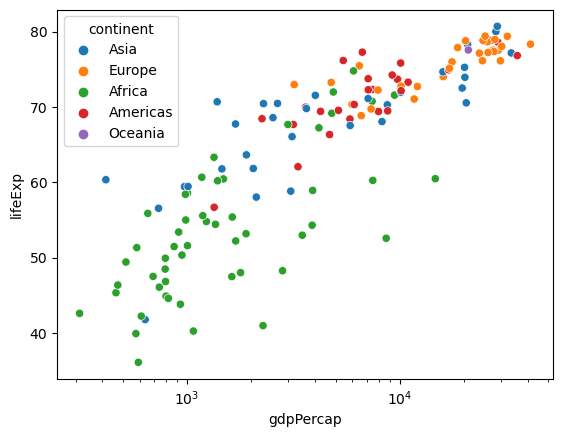

In [63]:
yr = 1997
sns.scatterplot(data = gapminder_df[gapminder_df['year'] == yr], x = "gdpPercap", y = "lifeExp", hue = "continent")
plt.xscale('log')

<div class="alert alert-success" role="alert"><p style="color:green">13. We can also resize each point to represent the population of each country. Copy and paste the above code below and then set a <b>size</b> argument to the appropriate population column.</p></div>

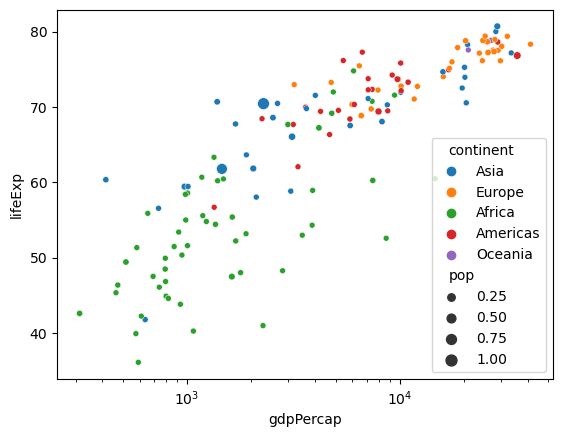

In [64]:
yr = 1997
sns.scatterplot(data = gapminder_df[gapminder_df['year'] == yr], x = "gdpPercap", y = "lifeExp", hue = "continent", size = "pop")
plt.xscale('log')

<div class="alert alert-success" role="alert"><p style="color:green">14. To greater differentiate between small and large countries, add a range of sizes like so:</p></div>

```
, sizes = (20, 600)

```

<div class="alert alert-success" role="alert"><p style="color:green"><i>If you were preparing this graph for publication, you would want to think carefully about how you want to proportionally size each circle. The general recommendation is that a value that is twice the size of another should be represented by a circle with twice the **area** not twice the **diameter** of the other. But, for this example, we are just concerned with placing countries of different population size on an observable spectrum.</i></p></div>

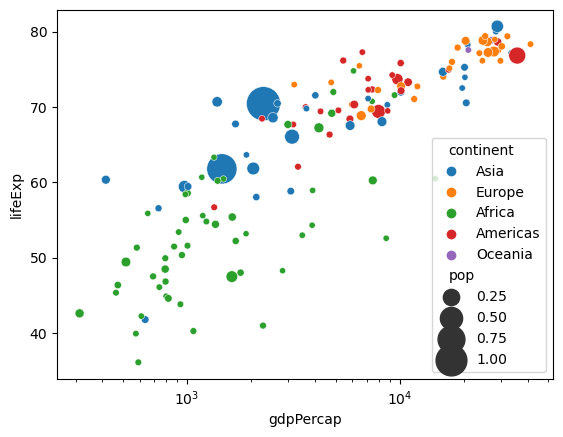

In [65]:
yr = 1997
sns.scatterplot(data = gapminder_df[gapminder_df['year'] == yr], x = "gdpPercap", y = "lifeExp", hue = "continent", size = "pop",\
                sizes = (20,600))
plt.xscale('log')

<div class="alert alert-success" role="alert"><p style="color:green">14. We can adjust the transparency of the circles to make overlapping circles more visible. We can do that using the <b>alpha</b> argument or paremeter. Add:</p></div>

```
alpha = 0.5,
```

<div class="alert alert-success" role="alert"><p style="color:green">Then feel free to adjust that value to see what looks the best (between 0.0 [invisible] and 1.0 [completely solid]).</p></div>

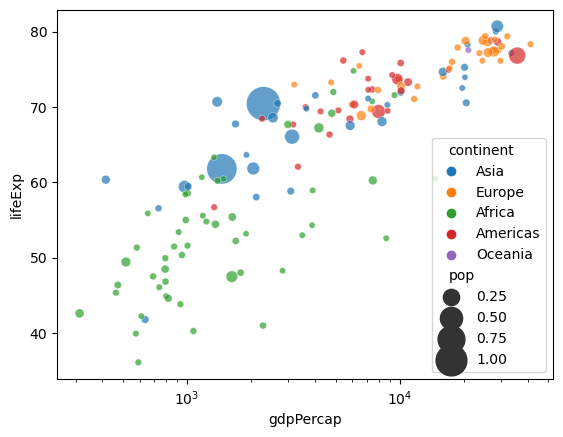

In [66]:
yr = 1997
sns.scatterplot(data = gapminder_df[gapminder_df['year'] == yr], x = "gdpPercap", y = "lifeExp", hue = "continent", size = "pop",\
                sizes = (20,600), alpha = 0.7)
plt.xscale('log')

## II. Adding a fourth dimension

15. So far we have graphed the following variables
+ country (circles)
+ continent (color of circles)
+ gdp per capita for each country (x)
+ life expectancy for each country (y)

However, we have done so only one year at a time. How can we graph changes in these data over time?

There are two principal ways to do this:
1. create small multiple plots, one for each year (good for print)
2. create an animated graph (great for the web)

<!--Before, we do that, however, we need to transform our dataset from a "wide" dataframe to a "long" dataframe to allow us to visualize all years at once (rather than one year at a time).

Our wide dataframe looks like this:-->

In [67]:
gapminder_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


### IIb. Creating small multiples

23. Most data visualization packages allow you to create multiple small version of a graph, each one representing a different subset of the data, using what are often called **facets**. We can use Seaborn [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) or [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) to accomplish this.

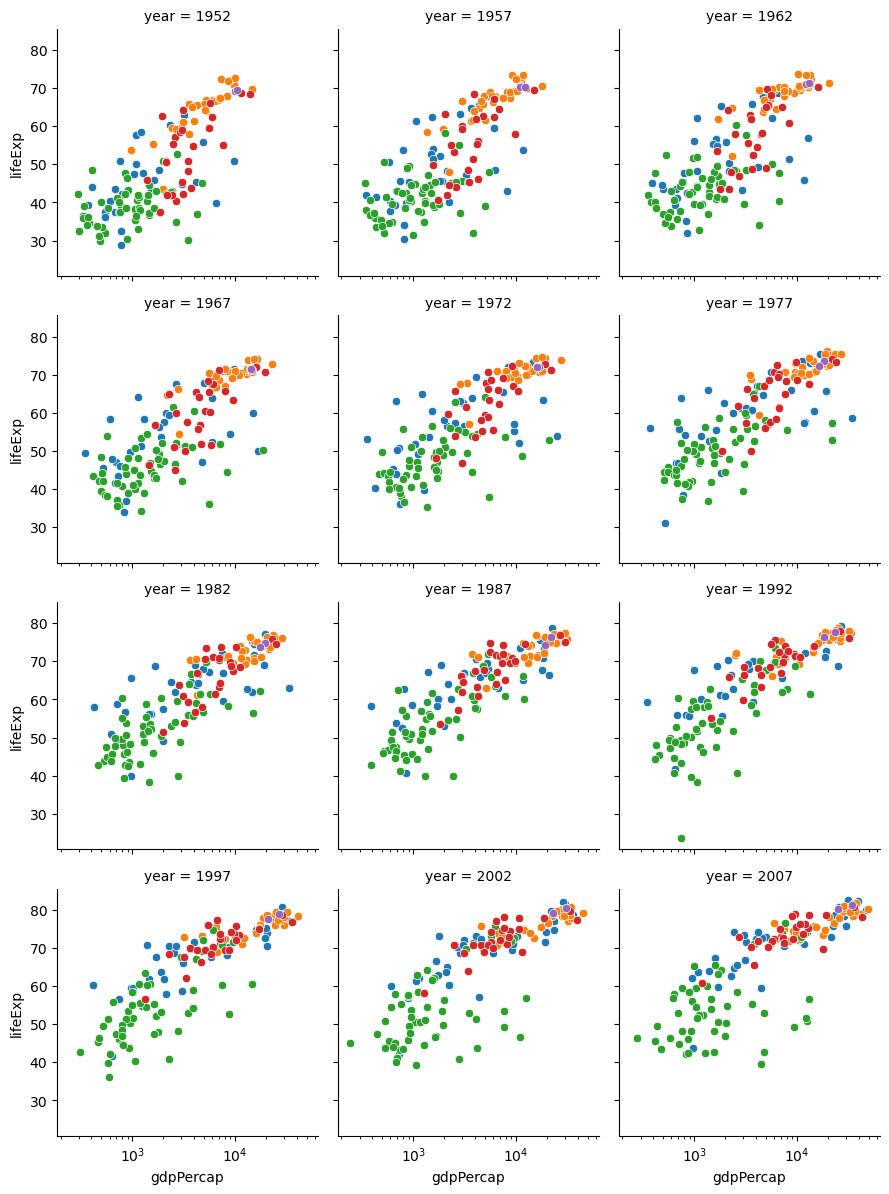

In [68]:
g = sns.FacetGrid(data = gapminder_df, col="year", col_wrap = 3, hue = "continent")
g.map(sns.scatterplot, "gdpPercap", "lifeExp")
plt.xscale('log')

24. Here is the same thing, but using **relplot** with some additional parameters (setting the transparency with "alpha" and the size of each marker).

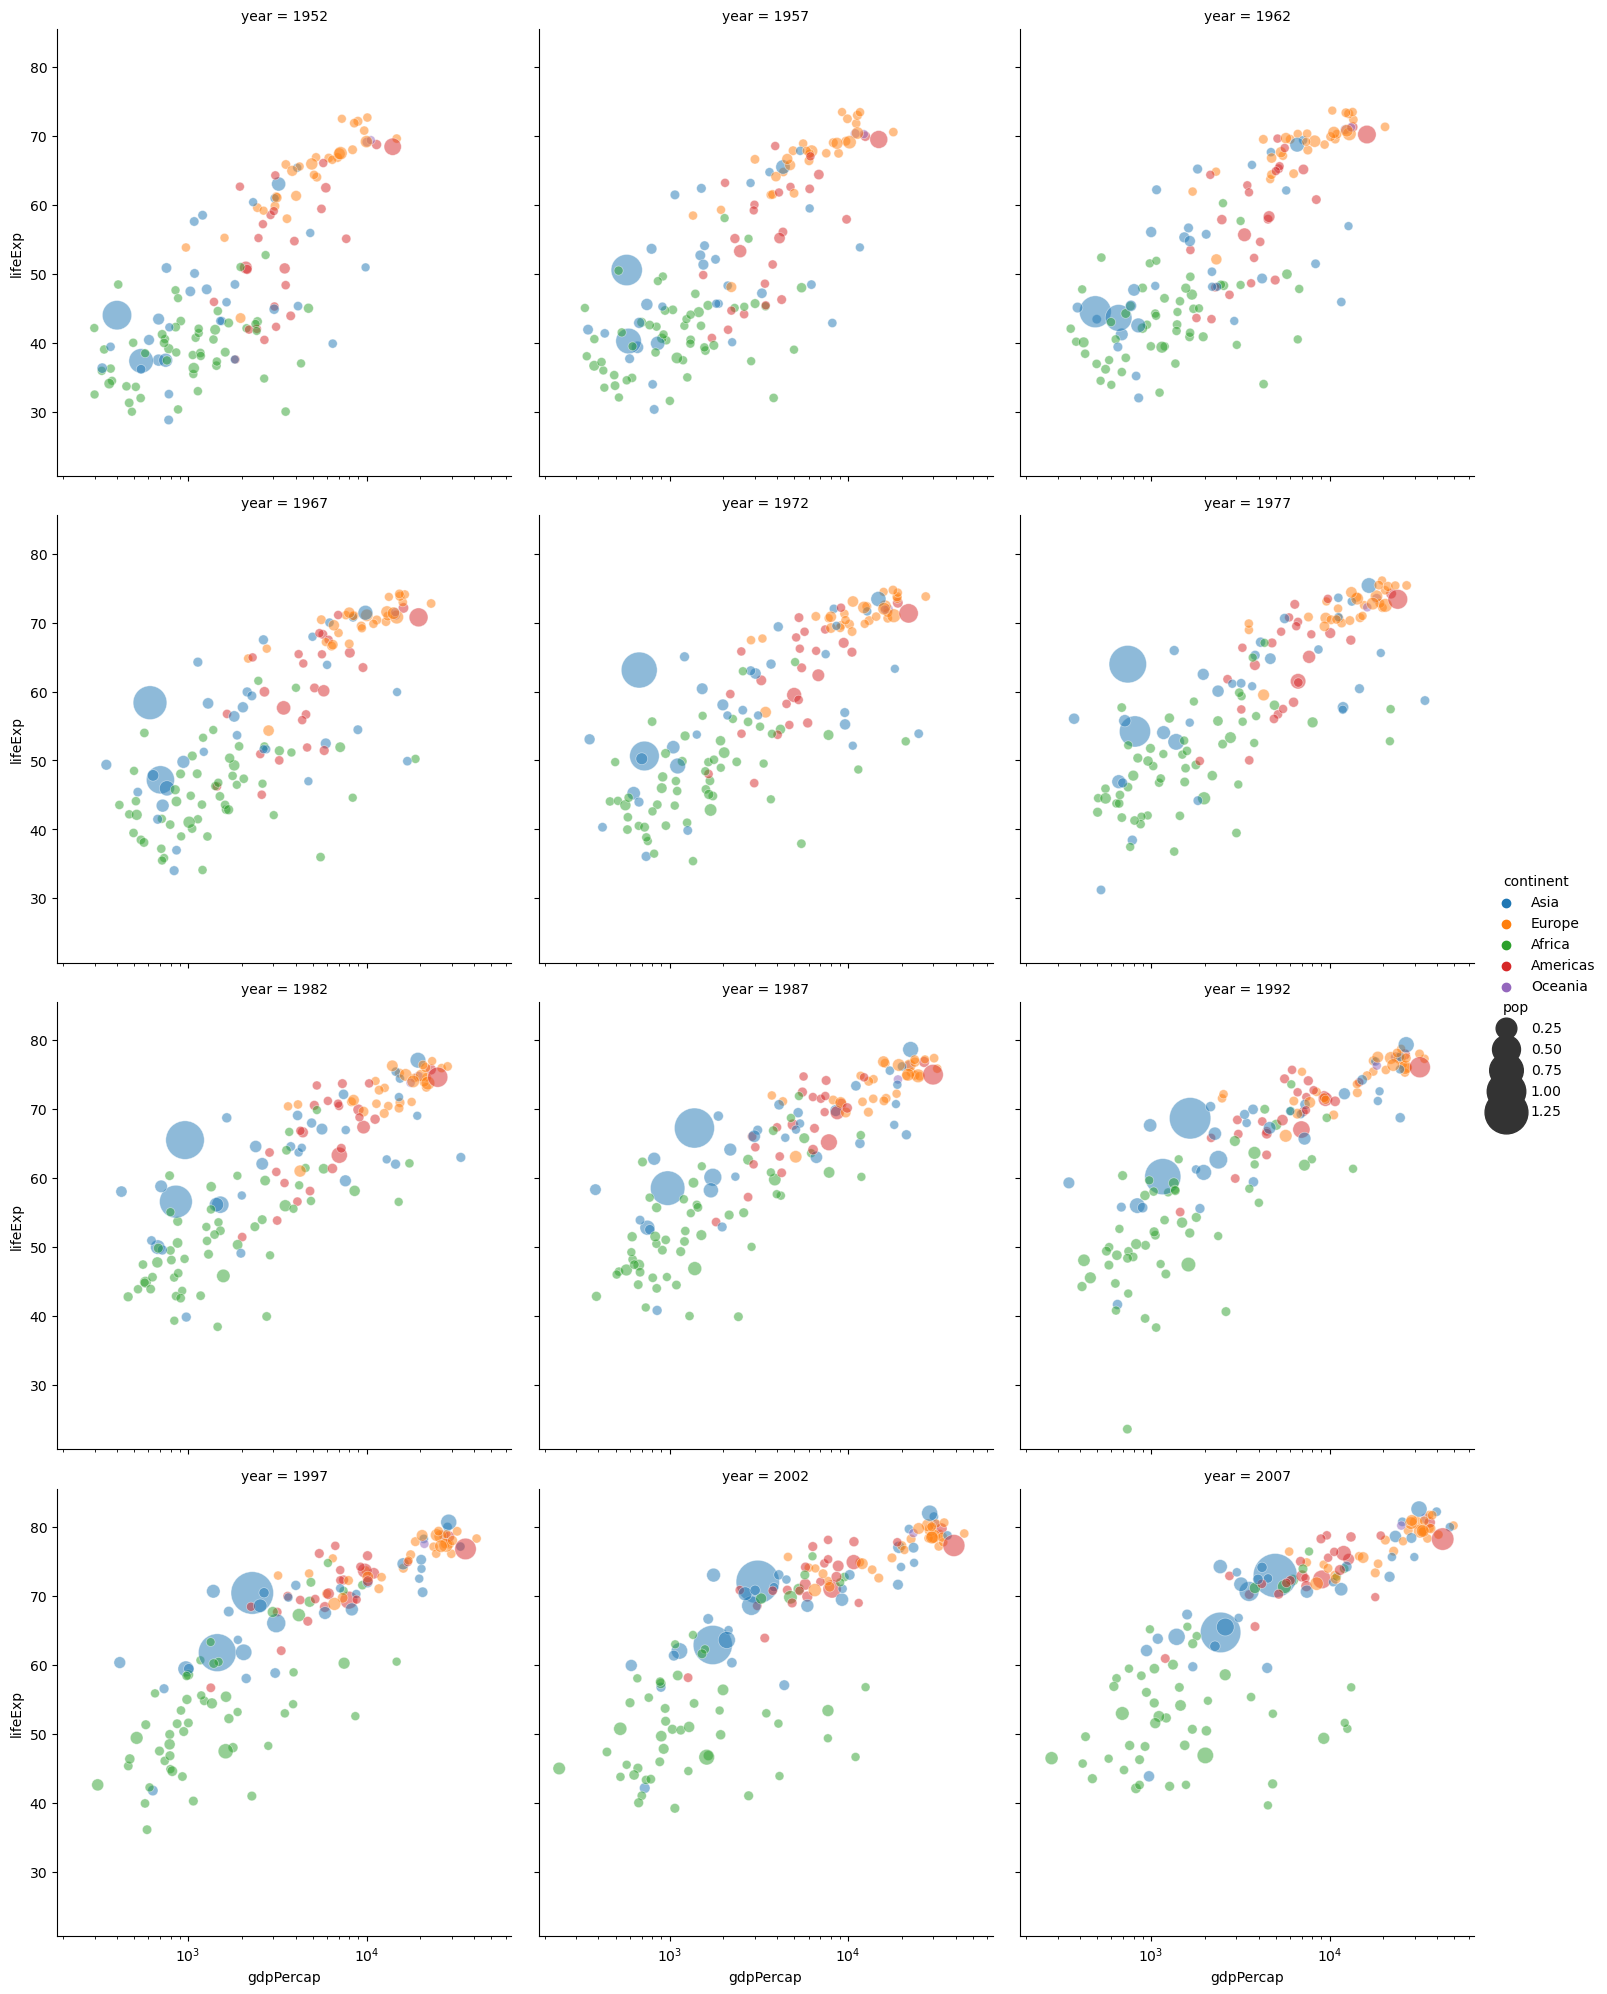

In [69]:
sns.relplot(data = gapminder_df, x = "gdpPercap", y = "lifeExp", size = "pop", hue = "continent",\
            col = "year", col_wrap = 3, \
                sizes = (40, 1000), alpha = 0.5)
plt.xscale('log')

### IIc. Creating Animated Graphs with Plotly

25. An even better way to add time as a fourth dimension is by creating an animated graphic. We can do that using the [Plotly library](https://plotly.com/python/). Below, however, we will use [Plotly Express](https://plotly.com/python/plotly-express/), which is a simplified, easier-to-use version of Plotly.

https://towardsdatascience.com/recreating-gapminder-animation-in-2-lines-of-python-with-plotly-express-2060c73bedec

27. Plotly Express's **scatter** function is similar to Seaborn's **scatterplot**. Important new parameters include **animation_frame**, **animation_group**, and **hover_name**.

In [70]:
px.scatter(gapminder_df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", 
           log_x = True, 
           size_max=45, range_x=[100,100000], range_y=[25,90])

In [73]:
gapminder_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


## Appendix: Other Visualizations of the Gapminder Dataset

We can also create simple plots, with far less data, through aggregation. For example, we can create a line plot after aggregating per capita GDP by continent.

<AxesSubplot:xlabel='year', ylabel='gdpPercap'>

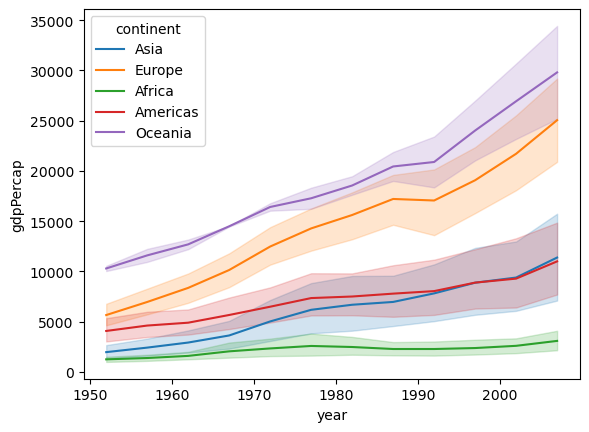

In [74]:
sns.lineplot(data = gapminder_df, x = 'year', y = 'gdpPercap', hue = 'continent')

In [75]:
gap_usa = gapminder_df.loc[(gapminder_df['country'] == "United States")] #& (gm_long['variable'].str.slice(0,3) == "gdp")]
gap_usa

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1608,United States,Americas,1952,68.440,157553000,13990.48208,USA,840
1609,United States,Americas,1957,69.490,171984000,14847.12712,USA,840
1610,United States,Americas,1962,70.210,186538000,16173.14586,USA,840
1611,United States,Americas,1967,70.760,198712000,19530.36557,USA,840
1612,United States,Americas,1972,71.340,209896000,21806.03594,USA,840
1613,United States,Americas,1977,73.380,220239000,24072.63213,USA,840
1614,United States,Americas,1982,74.650,232187835,25009.55914,USA,840
1615,United States,Americas,1987,75.020,242803533,29884.35041,USA,840
1616,United States,Americas,1992,76.090,256894189,32003.93224,USA,840
1617,United States,Americas,1997,76.810,272911760,35767.43303,USA,840


<AxesSubplot:xlabel='year', ylabel='gdpPercap'>

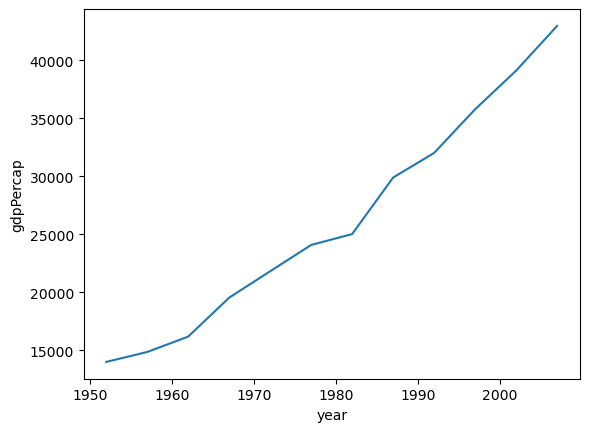

In [76]:
sns.lineplot(data = gap_usa, x = 'year', y = 'gdpPercap')

We can also separate each line into facets:

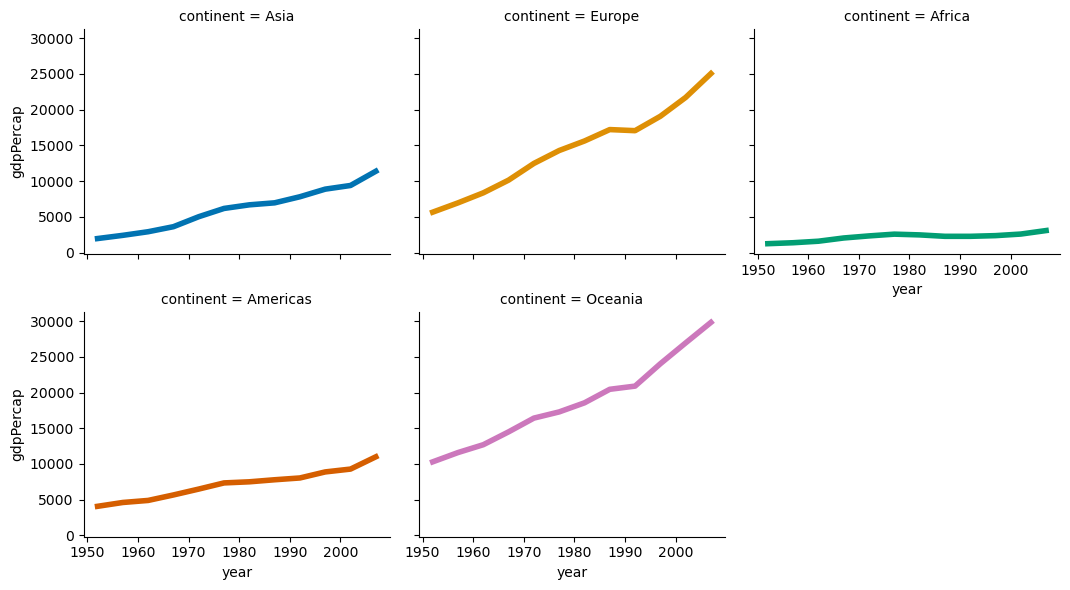

In [77]:
sns.relplot(data = gapminder_df, x="year", y="gdpPercap", kind = "line", linewidth = 4, \
            hue = "continent", \
                col = "continent",\
                    ci = None, \
                    col_wrap = 3, height = 3, aspect = 1.2, legend = False,\
                    palette = "colorblind"   #https://seaborn.pydata.org/tutorial/color_palettes.html
                        )